# PARCIAL DE IA
Estudiantes: Gabriela Lara y Camilo Gomez

Lo primero que se realiza es la instalacion de la libreria wfdb, la cual nos permitira procesar las señales de los electrocardiogramas suministrados por el profesor en una base de datos.

In [1]:
pip install wfdb

Note: you may need to restart the kernel to use updated packages.


Ahora se importa la libreria previamente instalada y  corremos  el archivo '16265' que posee la extension 'atr' ,y  generamos una grafica que muestre la señal.

[[-0.165 -0.325]
 [-0.155 -0.325]
 [-0.195 -0.305]
 ...
 [-0.05  -0.095]
 [-0.05  -0.085]
 [-0.05  -0.085]]


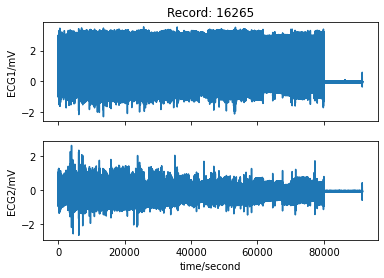

In [2]:
import wfdb
import numpy as np
pepito = wfdb.rdrecord('C:/Users/larag/PARCIALES/Clasificacion Latidos_IA/base de datos parcial final/16265')
print(pepito)
print(pepito.p_signal)
signals = pepito.p_signal
anotac = wfdb.rdann('C:/Users/larag/PARCIALES/Clasificacion Latidos_IA/base de datos parcial final/16265','atr').sample
wfdb.plot_wfdb(pepito)

Procesamos todos los archivos en busca de los que posean la extension 'atr', para mas adelante poder buscar entre estos en que momento ocurre un latido o no.

In [3]:
#ATRs de la carpeta
import os
import os.path
for dirpath, dirnames, filenames in os.walk("C:/Users/larag/PARCIALES/Clasificacion Latidos_IA/base de datos parcial final/"):
    #print("Ruta actual:", dirpath)
    #print(filenames)
    atr=[]
    for i in filenames:
        if i.endswith('.atr'):
            print(i)
            atr.append(i.replace('.atr', '', 1))

16265.atr
16272.atr
16273.atr
16420.atr
16483.atr
16539.atr
16773.atr
16786.atr
16795.atr
17052.atr
17453.atr
18177.atr
18184.atr
19088.atr
19090.atr
19093.atr
19140.atr
19830.atr


Una vez obtenidos los nombres de los archivos 'atr' procedemos a quitar la extension y mostrar cuantos archivos existen sin esta.




In [4]:
print(atr)
print(len(atr))

['16265', '16272', '16273', '16420', '16483', '16539', '16773', '16786', '16795', '17052', '17453', '18177', '18184', '19088', '19090', '19093', '19140', '19830']
18


Estas librerias seran utilizadas con el fin de poder graficar y realizar el entrenamiento del modelo. 

In [5]:
import matplotlib.pyplot as plt
from statistics import mode
import statistics as stat
from scipy.stats import skew
import random

dataset_fila=[]

#ATRs - latidos - 1 - 0

En este apartado se realizo una ventana deslizante con el fin de poder utilizarla en el electrocardiograma al momento de identificar si existe un latido o no, en un rango determinado por medio de los numeros 1 y 0, ademas de esto, se realizaron carracteristicas que ayuden al analisis de la clasificacion del latido.

carrateristicas utilizadas: 

-media

-kurtosis

-moda

-desviacion

-mediana

-asimetria 

import matplotlib.pyplot as plt
from statistics import mode
import statistics as stat
from scipy.stats import skew


for i in atr:
    print(i)
    txt="C:/Users/larag/PARCIALES/base de datos parcial final/"+i
    anotac = wfdb.rdann(txt,'atr').sample
    #print(anotac)\n",
    pepito=wfdb.rdrecord(txt)
    signals = pepito.p_signal
    signal1 = signals[:,0]
    
    for j in range (0, len(anotac)):
        fila_1=[]
        fila_0=[]
        try:    
            vb = signal1[anotac[j]-15 : anotac[j]+15]
            #media - mean
            media=float(np.mean(vb))
            
            #kurtosis
            kurtosis=np.std(vb)

            #moda - mode
            moda=float(mode(vb))

            #desviacion
            desviacion=stat.pstdev(vb)

            #mediana - median
            mediana=float(np.median(vb))

            #asimetria
            asimetria=float(skew(vb))

            #fila_1.append(media) #1
            #fila_1.append(kurtosis) #2
            #fila_1.append(moda) #3
            #fila_1.append(desviacion) #4
            #fila_1.append(mediana) #5
            #fila_1.append(asimetria) #6
            #fila_1.append(1)
            
            f1=[media, kurtosis, moda, desviacion, mediana, asimetria,1]

            dataset_fila.append(f1)
            #print(cont)

            #vb_nl = signal1[j+20 : j+1-20] 
            vb_nl=signal1[anotac[j]+8:anotac[j+1]-8]

            options = range(len(vb_nl)+1)
            options= list(options)
            
            if len(vb_nl) > 60:
                aux = True
                while aux == True:
                    r = random.choice(options)
                    if r - 15 > 0 and r + 15 < len(vb_nl):
                        aux = False
                inicio = r - 15 
                final = r + 15
                vb_nl0 = vb_nl[inicio:final]
                
            else:
                vb_nl0 = signal1[anotac[x]:anotac[x+1]]

            #media - mean
            media=float(np.mean(vb_nl0))

            #kurtosis
            kurtosis=np.std(vb_nl0)

            #moda - mode
            moda=float(mode(vb_nl0))

            #desviacion
            desviacion=stat.pstdev(vb_nl0)

            #mediana - median
            mediana=float(np.median(vb_nl0))

            #asimetria
            asimetria=float(skew(vb_nl0))

                #fila_0.append(media) #1
                #fila_0.append(kurtosis) #2
                #fila_0.append(moda) #3
                #fila_0.append(desviacion) #4
                #fila_0.append(mediana) #5
                #fila_0.append(asimetria) #6
                #fila_0.append(0)
                
            f0=[media, kurtosis, moda, desviacion, mediana, asimetria,0]
            dataset_fila.append(f0)
                #print(cont)
                
                
        except:
            continue
                
    print(len(dataset_fila))
print(len(dataset_fila))

# DATASET CON 3'378.815 DATOS

Importamos la libreria pandas con el fin de recorrer un archivo csv creado con la clasificacion de 1 y 0, para no tener que ejecutar todo el codigo anterior de nuevo ya que consume mucho tiempo su ejecucion.

In [6]:
import pandas as pd

import pandas as pd
dataframe=pd.DataFrame(dataset_fila, columns=["media", "kurtosis", "moda", "desviacion estandar", "mediana", "asimetria", "latido"])

dataframe.to_csv(r'C:/Users/larag/PARCIALES/DataFrame.csv',index=False, header=True)

En este apartado se muestra que no existen valores nulos en las carracteristicas.

In [7]:
dataframe2=pd.read_csv('C:/Users/larag/PARCIALES/Clasificacion Latidos_IA/DataFrame.csv')
dataframe2.isnull().sum()

media                  0
kurtosis               0
moda                   0
desviacion estandar    0
mediana                0
asimetria              0
latido                 0
dtype: int64

Se muestra el dataframe donde se pueden observan los valores de la media, kurtosis, moda, desviacion estandar, mediana, asimetria y el latido ya clasificado donde hay 3378816 filas × 7 columnas.


In [8]:
dataframe2

,media,kurtosis,moda,desviacion estandar,mediana,asimetria,latido
0,0.102000,0.897679,-0.155,0.897679,-0.1950,2.059661,1
1,-0.134000,0.029138,-0.125,0.029138,-0.1350,0.240603,0
2,0.124000,0.914507,-0.275,0.914507,-0.1800,2.142393,1
3,-0.123667,0.028605,-0.115,0.028605,-0.1150,-1.304937,0
4,0.134333,0.919010,-0.155,0.919010,-0.1600,2.063486,1
...,...,...,...,...,...,...,...
3378811,-0.288333,0.032489,-0.305,0.032489,-0.2950,1.792114,0
3378812,-0.229000,0.188337,-0.345,0.188337,-0.2850,2.522551,1
3378813,-0.236000,0.048121,-0.245,0.048121,-0.2450,-0.263405,0
3378814,-0.174667,0.193984,-0.285,0.193984,-0.2450,2.880238,1


Se muestra la cantidad de 0 y 1 existentes y atraves de una grafica. mostrando todos los datos obtenidos, donde existen mas valores de 1 que 0.

1    1806781
0    1572035
Name: latido, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latido', ylabel='count'>

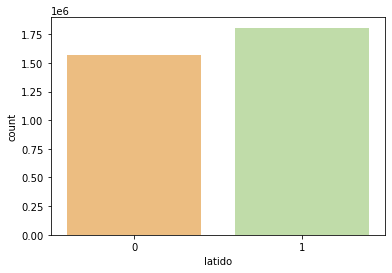

In [9]:
import seaborn as sns
print(dataframe2['latido'].value_counts())
print("")
sns.countplot(dataframe2['latido'], palette='Spectral')

# DATASET CON 400.000 DATOS

Se muestra la cantidad de 0 y 1 existentes y atraves de una grafica. con 4000.000 datos de 3'378.815 donde se observa que existen mas valores de 1.

1    211856
0    188144
Name: latido, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latido', ylabel='count'>

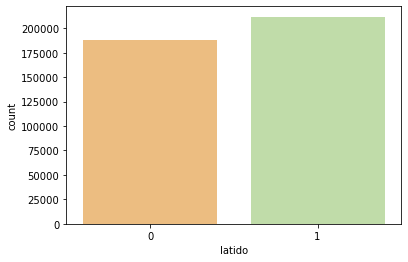

In [10]:
dataframe3=dataframe2.head(400000)
print(dataframe3['latido'].value_counts())
print("")
sns.countplot(dataframe3['latido'], palette='Spectral')

# Creación del modelo

El modelo utilizado para clasificar el comportamiento fue la librearia MLPClassifier, de la mano de RandomizedSearchCV para la optimizacion de hiperparametros: hidden_layer_sizes, activation, max_iter, learning_rate_init


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [12]:
x=dataframe3[[ "media", "kurtosis", "moda", "desviacion estandar", "mediana", "asimetria"]]
y=dataframe3[[ "latido"]]

X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.6)

clf = MLPClassifier()
parametros = {'hidden_layer_sizes': [(100,),(10,50,10),(20,),(100,100)],'activation': ['identity', 'logistic', 'tanh', 'relu'],'max_iter': np.arange(200,1000,100),'learning_rate_init': np.arange(0.001,0.005,0.001)}
Randomized=RandomizedSearchCV(clf, parametros,cv=5,n_iter=3)

Randomized.fit(X_train, y_train)
#print(len(X_train))
#clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=200, learning_rate_init=0.001).fit(X_train, y_train)
#clf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=3,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (10, 50, 10),
                                                               (20,),
                                                               (100, 100)],
                                        'learning_rate_init': array([0.001, 0.002, 0.003, 0.004]),
                                        'max_iter': array([200, 300, 400, 500, 600, 700, 800, 900])})

a continuacion se puede ver la etapa de entrenamiento del modelo, donde se puede observar el mejor desempeño y el mejor parametro. 

In [13]:
print("Mejor Desempeño: ",Randomized.best_score_)
print("Mejor Parametro: ",Randomized.best_params_)

Mejor Desempeño:  0.9861749999999999
Mejor Parametro:  {'max_iter': 300, 'learning_rate_init': 0.004, 'hidden_layer_sizes': (20,), 'activation': 'tanh'}


En este apartado se puede pareciar el resultado de la prueba del modelo con un conjunto de datos.

In [14]:
from sklearn.metrics import f1_score
pred_y = Randomized.predict(X_test)
f1_score(y_test, pred_y)

0.9865938047578034

se decidio hacer una matriz de confusion ya que esta nos permite visualizar el desempeño mostrandonos los aciertos y errores que tiene el modelo por medio de las clases:  

- verdaderos positivos: se logran observar 74173

- Falsos positivos: se logran observar 887

- Falsos negativos: se logran observar 1361

- verdaderos negativos:se logran observar 83579

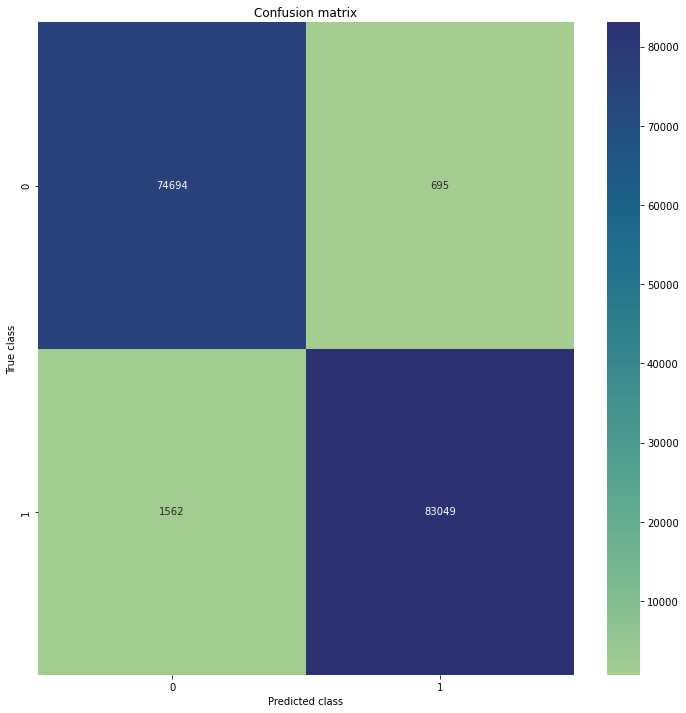

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     75389
           1       0.99      0.98      0.99     84611

    accuracy                           0.99    160000
   macro avg       0.99      0.99      0.99    160000
weighted avg       0.99      0.99      0.99    160000



In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d",cmap="crest");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, pred_y))

# PRUEBA DEL MODELO EN UNA SEÑAL

seleccionamos la señal '16795' para probar el modelo y esta señal cuenta con 87678 datos.

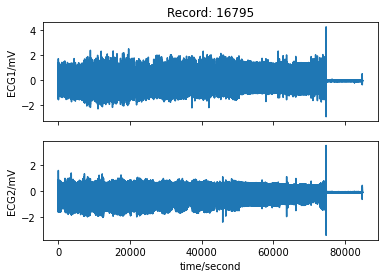

87678


In [16]:
pepito = wfdb.rdrecord('C:/Users/larag/PARCIALES/Clasificacion Latidos_IA/base de datos parcial final/16795')
signals = pepito.p_signal
signal1 = signals[:,0]
wfdb.plot_wfdb(pepito)

anotac = wfdb.rdann('C:/Users/larag/PARCIALES/Clasificacion Latidos_IA/base de datos parcial final/16795','atr').sample

print(len(anotac))

En esta parte se realiza el dataset de la señal escogida con las 6 caracteristicas seleccionadas previamente, con una ventana de observacion de 20 y el fragmento escogido de la señal signal1[:800], por ende tenemos un total de 40 ventanas que se le pasaran al modelo.

In [17]:
import statistics as stat

end = 20 
aux = end
dataset_p=[]
start = 0

     
for x in range(0,40):
    
    vb_p = signal1[start:end]
  
    #media - mean
    media=float(np.mean(vb_p))

    #kurtosis
    kurtosis=np.std(vb_p)

    #moda - mode
    moda=float(stat.mode(vb_p))

    #desviacion
    desviacion=stat.pstdev(vb_p)

    #mediana - median
    mediana=float(np.median(vb_p))

    #asimetria
    asimetria=float(skew(vb_p))
    
    caract = [media,kurtosis,moda,desviacion,mediana,asimetria]
    dataset_p.append(caract)
    start = end
    end = end + aux


columns1=["media", "kurtosis", "moda", "desviacion estandar", "mediana", "asimetria"]
lista = dataset_p
df_p = pd.DataFrame(lista, columns = columns1)
df_p

,media,kurtosis,moda,desviacion estandar,mediana,asimetria
0,-0.0235,0.423866,0.125,0.423866,0.005,-0.383025
1,0.1070,0.081462,0.045,0.081462,0.105,0.782449
2,0.2735,0.199782,0.415,0.199782,0.315,-0.485367
3,-0.0785,0.021042,-0.085,0.021042,-0.080,-0.371209
4,-0.0825,0.022776,-0.105,0.022776,-0.085,0.503064
5,-0.0320,0.100950,-0.045,0.100950,-0.045,1.472953
6,-0.1105,0.431259,-0.035,0.431259,-0.040,-0.232931
7,0.2405,0.135590,0.155,0.135590,0.230,-0.070268
8,-0.1855,0.077037,-0.155,0.077037,-0.215,1.192597
9,-0.2220,0.031953,-0.225,0.031953,-0.225,0.949727


Los datos anteriores del dataset se van a pasar al modelo para que se haga la calsificacion y se muestre el resultado, para asi poder comparar la grafica de la prediccion con la de la señal. 



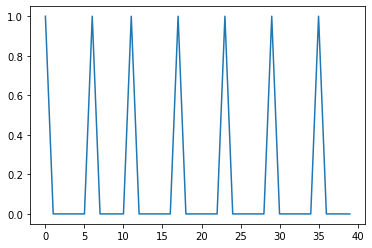

In [18]:
X_test_sp = df_p[["media", "kurtosis", "moda", "desviacion estandar", "mediana", "asimetria"]]
predict = Randomized.predict(X_test_sp)
df_p['predicción'] = predict
plt.plot(predict)

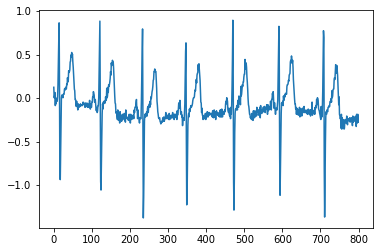

In [19]:
plt.plot(signal1[:800])

0    33
1     7
Name: predicción, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='predicción', ylabel='count'>

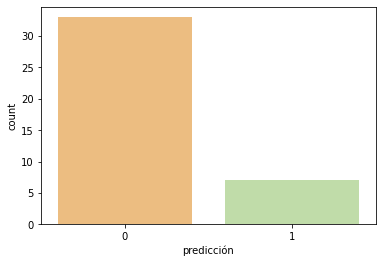

In [20]:
print(df_p['predicción'].value_counts())
sns.countplot(df_p['predicción'], palette='Spectral')

# Conclusiones

se puede observar que fueron detectados correctamente 7 latidos, los cuales corresponden al fragmento que se encuentra en nuestra señal, ademas de esto al momento de comparar las graficas se observa un comportamiento similar. 

**¿Qué problemas puedes observar usando únicamente la gráfica? y ¿Por qué se puede deber eso?**

Es muy dificil poder determinar que tan precisa es la prediccion del modelo, esto se debe a que las señales son diferentes unas de otras(los latidos no siempre son "continuos", algunos latidos tienden a ser clasificados como no latidos).



**Mencione una estrategia que puedas utilizar o implementar para mejorarlo.**

Una de las formas que podrian mejorar la presicion del modelo establecido es realizar la eliminacion de datos atipicos, ya que estos pueden generar incongruencias al momento de entrenar el modelo. 


